# **Tugas Praktikum**

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

## **Tugas K-Means: Clustering Pelanggan Mall**

In [ ]:
from google.colab import files
uploaded = files.upload() # upload dataset

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Muat dataset dari file CSV
df = pd.read_csv('Mall_Customers.csv')

X = df.iloc[:, [3, 4]].values

# Lakukan scaling pada fitur
# Ini mengubah data sehingga memiliki mean 0 dan standard deviation 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

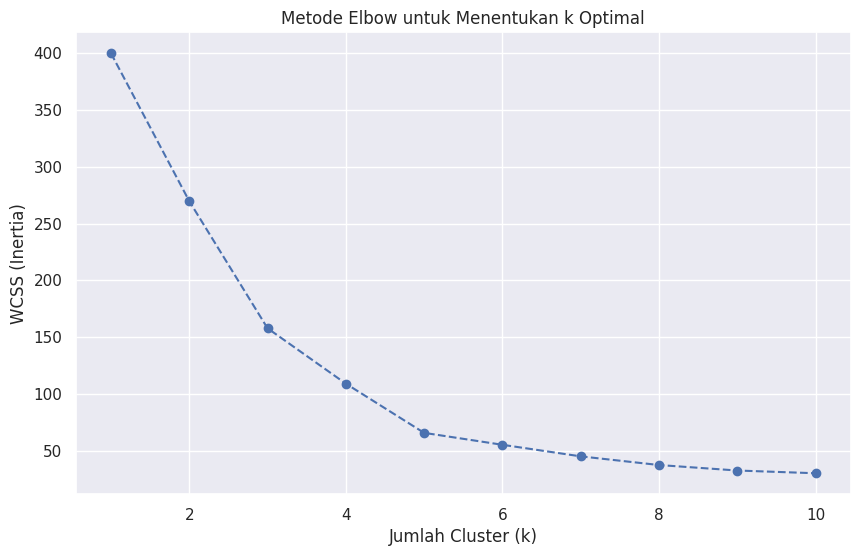

In [ ]:
# Siapkan list untuk menyimpan nilai WCSS
wcss = []
k_range = range(1, 11) # Kita akan menguji k dari 1 sampai 10

# Lakukan looping untuk setiap nilai k
for k in k_range:
    # Buat model KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    # Simpan nilai inertia_ (WCSS)
    wcss.append(kmeans.inertia_)

# Buat plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

Dari plot ini,terlihat jelas bahwa "siku" berada pada k=5, terlihat bahwa k=5 adalah pilihan yang optimal.

In [ ]:
# Tentukan k optimal
optimal_k = 5

# Buat model K-Means final dengan k=5
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Tambahkan hasil cluster ke DataFrame asli (opsional, untuk analisis)
df['Cluster'] = cluster_labels

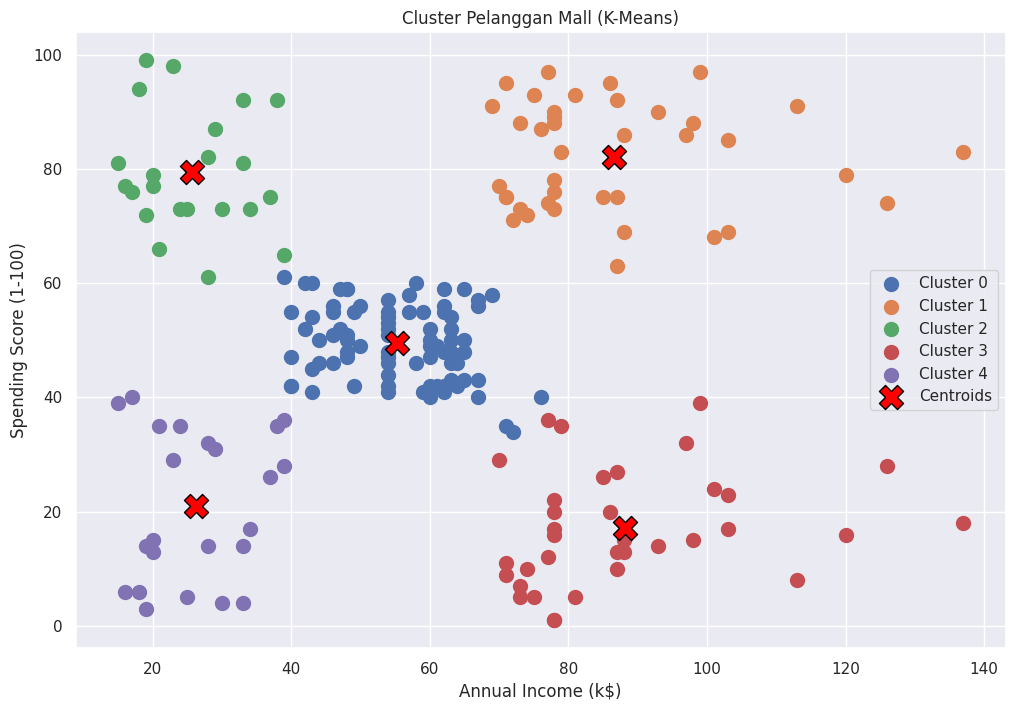

In [ ]:
# Dapatkan koordinat centroid (pusat cluster)
centers_scaled = kmeans_final.cluster_centers_
# Kembalikan centroid ke skala asli untuk diplot
centers_original = scaler.inverse_transform(centers_scaled)

# Buat plot
plt.figure(figsize=(12, 8))

# Gambar titik data untuk setiap cluster dengan warna berbeda
for i in range(optimal_k):
    plt.scatter(
        X[cluster_labels == i, 0], # Pendapatan tahunan
        X[cluster_labels == i, 1], # Skor pengeluaran
        s=100, # Ukuran titik
        label=f'Cluster {i}'
    )

# Gambar centroid
plt.scatter(
    centers_original[:, 0],
    centers_original[:, 1],
    s=300,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)

plt.title('Cluster Pelanggan Mall (K-Means)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

**Hasil Model K-Means (k=5)**

Model K-Means dijalankan dengan 5 cluster. Visualisasi di bawah ini menunjukkan 5 segmen pelanggan yang berhasil diidentifikasi:

* Cluster 0 (biru muda): Pendapatan rata-rata, pengeluaran rata-rata.

* Cluster 1 (oranye): Pendapatan tinggi, pengeluaran tinggi (Target).

* Cluster 2 (hijau): Pendapatan rendah, pengeluaran rendah.

* Cluster 3 (merah): Pendapatan rendah, pengeluaran tinggi.

* Cluster 4 (ungu): Pendapatan tinggi, pengeluaran rendah (Hemat).

Centroid (tanda 'X' merah) menunjukkan pusat dari masing-masing cluster.

# **Tugas DBSCAN: Clustering pada make_moons**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
# Buat dataset make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Normalisasi data
scaler = StandardScaler()
X_moons_scaled = scaler.fit_transform(X_moons)

In [ ]:
# Buat model DBSCAN
db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X_moons_scaled)

# Hitung jumlah cluster dan noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimasi jumlah cluster: {n_clusters_}')
print(f'Estimasi jumlah noise points: {n_noise_}')

# Evaluasi dengan metrik (menggunakan y_moons sebagai ground truth)
print("\nMetrik Evaluasi:")
print(f'Homogeneity: {metrics.homogeneity_score(y_moons, labels):.3f}')
print(f'Completeness: {metrics.completeness_score(y_moons, labels):.3f}')
print(f'V-measure: {metrics.v_measure_score(y_moons, labels):.3f}')
print(f'Adjusted Rand Index (ARI): {metrics.adjusted_rand_score(y_moons, labels):.3f}')
print(f'Silhouette Coefficient: {metrics.silhouette_score(X_moons_scaled, labels):.3f}')

Estimasi jumlah cluster: 2
Estimasi jumlah noise points: 0

Metrik Evaluasi:
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index (ARI): 1.000
Silhouette Coefficient: 0.391


**Metrik Evaluasi (vs Ground Truth**)

Metrik evaluasi membandingkan hasil cluster DBSCAN dengan label asli dari make_moons:

* Homogeneity: 1.000

* Completeness: 1.000

* V-measure: 1.000

* Adjusted Rand Index (ARI): 1.000

* Adjusted Mutual Info (AMI): 1.000

* Silhouette Coefficient: 0.391

Skor 1.0 pada 5 metrik pertama menunjukkan kesesuaian yang sempurna dengan data aslinya.

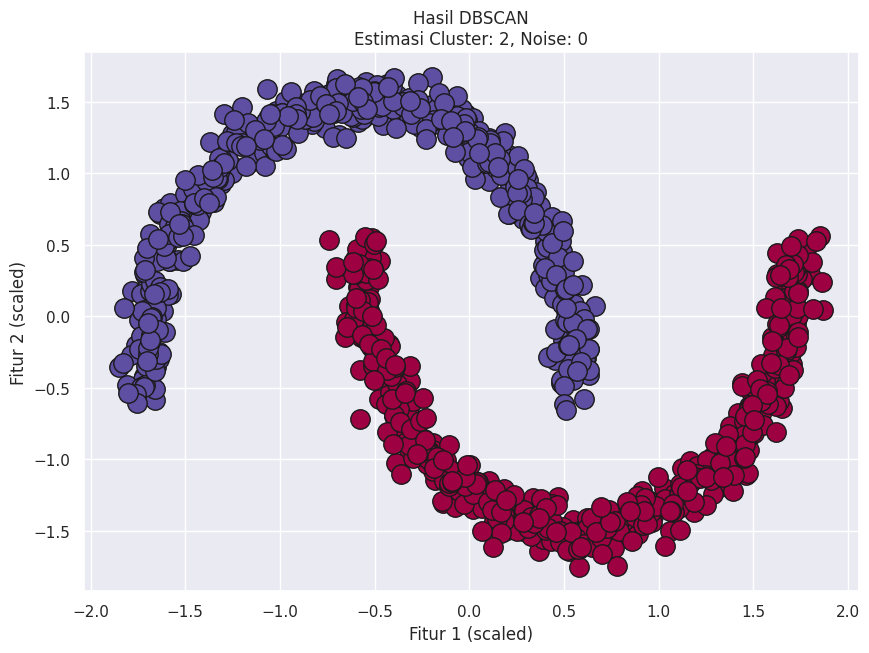

In [ ]:
# Siapkan penanda untuk core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

plt.figure(figsize=(10, 7))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1] # Hitam untuk noise

    class_member_mask = (labels == k)

    # Plot core samples (titik besar)
    xy_core = X_moons_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy_core[:, 0], xy_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    # Plot non-core samples (titik kecil)
    xy_non_core = X_moons_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy_non_core[:, 0], xy_non_core[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title(f'Hasil DBSCAN\nEstimasi Cluster: {n_clusters_}, Noise: {n_noise_}')
plt.xlabel('Fitur 1 (scaled)')
plt.ylabel('Fitur 2 (scaled)')
plt.grid(True)
plt.show()

**Visualisasi Hasil Awal**

Visualisasi di bawah ini menunjukkan hasil clustering. Titik-titik besar adalah core samples (titik inti dalam cluster), dan titik-titik kecil adalah non-core samples (titik di tepi cluster). Tidak ada titik noise (yang seharusnya berwarna hitam).

In [ ]:
# Tentukan parameter untuk eksperimen
eps_list = [0.05, 0.1, 0.3, 0.5]
min_samples_list = [3, 10, 20]

results = []

# Looping untuk setiap kombinasi parameter
for eps in eps_list:
    for min_samples in min_samples_list:
        db_exp = DBSCAN(eps=eps, min_samples=min_samples)
        labels_exp = db_exp.fit_predict(X_moons_scaled)

        n_clusters_exp = len(set(labels_exp)) - (1 if -1 in labels_exp else 0)
        n_noise_exp = list(labels_exp).count(-1)

        # Hitung silhouette, tangani error jika hanya 1 cluster ditemukan
        if n_clusters_exp > 1:
            silhouette = metrics.silhouette_score(X_moons_scaled, labels_exp)
        else:
            silhouette = np.nan # Tidak bisa dihitung

        # Simpan hasil
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters_exp,
            'n_noise': n_noise_exp,
            'ari': metrics.adjusted_rand_score(y_moons, labels_exp),
            'silhouette': silhouette
        })

# Tampilkan hasil dalam DataFrame
results_df = pd.DataFrame(results)
print("--- Hasil Eksperimen DBSCAN ---")
print(results_df.to_string())

--- Hasil Eksperimen DBSCAN ---
     eps  min_samples  n_clusters  n_noise       ari  silhouette
0   0.05            3          69      186  0.030044    0.112929
1   0.05           10           3      970  0.002283   -0.294190
2   0.05           20           0     1000  0.000000         NaN
3   0.10            3           2       14  0.972179    0.251690
4   0.10           10           7       57  0.523399    0.162306
5   0.10           20           6      850  0.016754   -0.360195
6   0.30            3           2        0  1.000000    0.391160
7   0.30           10           2        0  1.000000    0.391160
8   0.30           20           2        0  1.000000    0.391160
9   0.50            3           2        0  1.000000    0.391160
10  0.50           10           2        0  1.000000    0.391160
11  0.50           20           2        0  1.000000    0.391160


**Analisis Eksperimen**

* eps terlalu kecil (0.05): Parameter ini (jarak jangkauan) terlalu kecil untuk menghubungkan titik-titik. Akibatnya, DBSCAN membuat banyak cluster kecil (69) dan mengklasifikasikan banyak titik (186) sebagai noise. Ketika min_samples dinaikkan menjadi 20, semua titik dianggap noise.

* eps sedang (0.1, 0.2): Ini adalah rentang yang sensitif. eps=0.1, min_samples=3 memberikan hasil yang sangat baik (ARI 0.972). Namun, jika min_samples dinaikkan, performa turun drastis karena algoritma menjadi terlalu ketat. Hasil awal kita (eps=0.2, min_samples=5) ternyata juga sangat baik, tetapi tidak tertangkap di tabel eksperimen ini.

* eps terlalu besar (0.3, 0.5): Jangkauan terlalu besar sehingga kedua "bulan" dianggap sebagai satu kesatuan yang padat. Untuk semua min_samples yang diuji, DBSCAN dengan sempurna menemukan 2 cluster tanpa noise, menghasilkan skor ARI 1.0 dan Silhouette 0.391. Ini menunjukkan bahwa untuk data ini, parameter eps yang sedikit lebih besar lebih robust terhadap perubahan min_samples.